<font color = "red" > <h1> CNN Implementation


In [1]:
from keras.models import Sequential
from keras.layers import Dense,Input,Conv2D,MaxPooling2D,Flatten
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.utils import plot_model

import skimage
from skimage.io import imshow

import matplotlib.pyplot as plt
import numpy as np

## Hyperparameters Parameters


In [2]:
batch_size = 128
nb_class = 10
nb_epoch = 10

## Load Data


In [3]:

(X_train,y_train),(X_test,y_test) = mnist.load_data()

## Data statistics


In [4]:
print("Number of Traning samples", len(X_train))
print("Number of Accociate Lebels", len(y_train))

print("Shaoe  of Traning samples", X_train.shape)
print("Datatype of Traning samples", X_train.dtype)


print("Number of Text samples", len(X_test))
print("Number of Accociate Lebels", len(y_test))


print("Shaoe  of Traning Label", y_train.shape)
print("Shaoe  of Traning Label", X_train.shape)

Number of Traning samples 60000
Number of Accociate Lebels 60000
Shaoe  of Traning samples (60000, 28, 28)
Datatype of Traning samples uint8
Number of Text samples 10000
Number of Accociate Lebels 10000
Shaoe  of Traning Label (60000,)
Shaoe  of Traning Label (60000, 28, 28)


## Visiualize data


In [5]:
X_train[0].shape

(28, 28)

In [6]:
a_random_sample = X_train[0]
a_random_sample

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

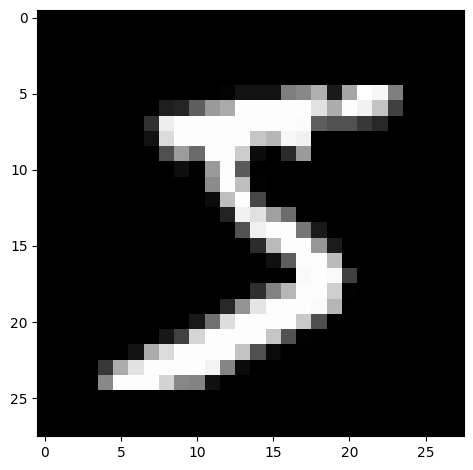

In [7]:
random_image = X_train[0]
imshow(random_image)

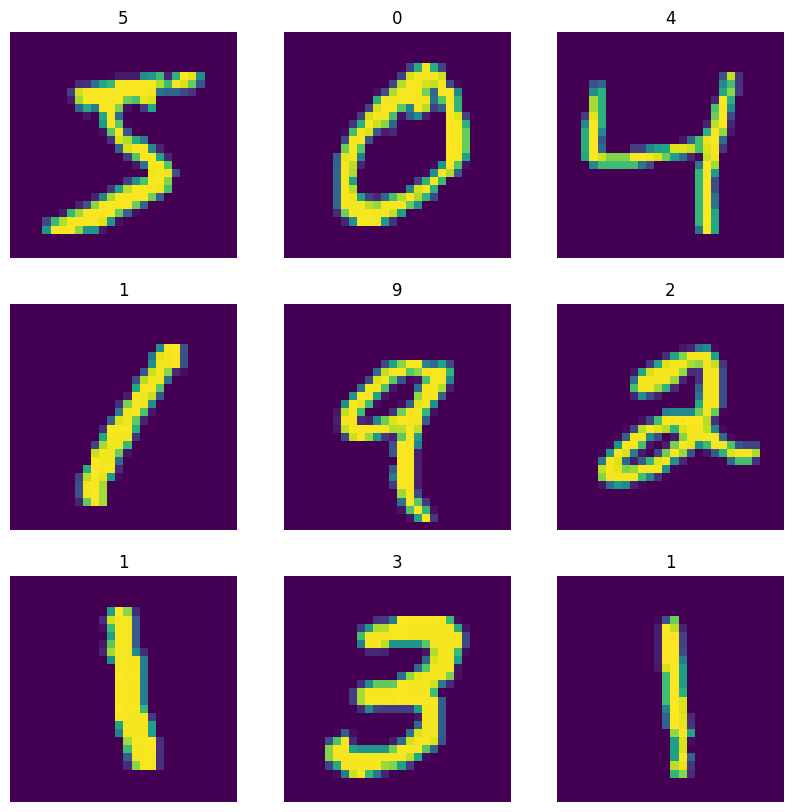

In [8]:
plt.figure(figsize=(10,10))

for i in range(9):
    ax= plt.subplot(3,3,i+1)

    an_image =X_train[i]

    plt.imshow(an_image)

    plt.title(int(y_train[i]))

    plt.axis("off")

## Change dataType of Train and Test data


In [9]:
print("Previous Datatype of Train and Test samples : ")
print(X_train.dtype)
print(X_test.dtype)

Previous Datatype of Train and Test samples : 
uint8
uint8


In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print("new Datatype of Train and Test samples : ")
print(X_train.dtype)
print(X_test.dtype)

new Datatype of Train and Test samples : 
float32
float32


## Rescaling data


In [11]:
# get a random sample
a_sample = X_train[0]

print('Min value of samle: ',a_sample.min())
print('Max value of samle: ',a_sample.max())

Min value of samle:  0.0
Max value of samle:  255.0


In [12]:
# derive each value in train and test data by 255

X_train /=255
X_test /=255

In [13]:
a_sample = X_train[0]

print('Min value of samle: ',a_sample.min())
print('Max value of samle: ',a_sample.max())

Min value of samle:  0.0
Max value of samle:  1.0


## Reshape Train and Test data to 4D


In [14]:
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

print('X_train shaoe: ',X_train.shape)
print('X_test shaoe: ',X_test.shape)


x_train shaoe:  (60000, 28, 28, 1)
x_test shaoe:  (10000, 28, 28, 1)


## Binarize Lebels


In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
y_train.shape

(60000,)

In [17]:
input_array = np.array([0,1,2,3,4,5,6,7,8,9])
print(input_array)
print("Input list shape : ",input_array.shape)

output = to_categorical(input_array,num_classes=10)

print(output)
print("input list shape :" , input_array.shape)

[0 1 2 3 4 5 6 7 8 9]
Input list shape :  (10,)
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
input list shape : (10,)


In [19]:

num_classes = 10

y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)


## Define Model


In [20]:
input_shape = (28,28,1)

model = Sequential()

model.add(Input(shape=input_shape))

model.add(Conv2D(32,kernel_size=(3,3),activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(num_classes,activation="softmax"))

## Compile Model


In [21]:
learning_rate = 0.001

optimizer = SGD(learning_rate=learning_rate)

loss = 'categorical_crossentropy'
metrics =['accuracy']

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

## Visualize Model


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        54,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,410 (212.54 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

# Model traning


In [23]:

history = model.fit(X_train, y_train, epochs=nb_epoch, batch_size=batch_size)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.2021 - loss: 2.2663
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.6374 - loss: 1.9914
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.7546 - loss: 1.5172
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.8000 - loss: 1.0483
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.8275 - loss: 0.7808
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.8432 - loss: 0.6484
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.8587 - loss: 0.5633
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.8625 - loss: 0.5199
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.8693 - loss: 0.4818
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.8759 - loss: 0.4532


### Inference On Test Data


In [24]:
evalution = model.evaluate(X_test,y_test)

print("Summary : loss over the test dataset: %.2f, accuracy: %.2f" % (evalution[0]*100,evalution[1]*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8671 - loss: 0.4729
Summary : loss over the test dataset: 41.95, accuracy: 88.64


In [25]:
training_loss = history.history['loss']

epoch_count = range(1,len(training_loss)+1)

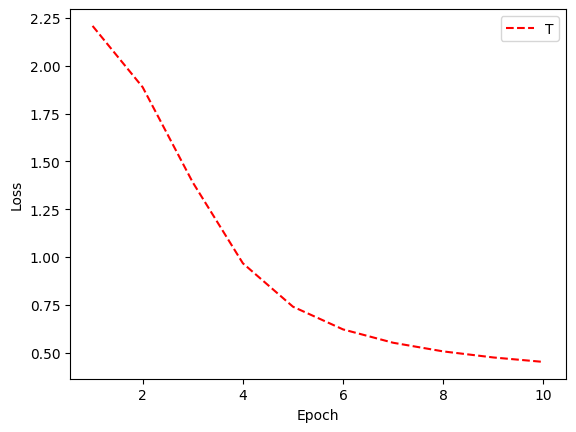

In [27]:
# visualize loss history

plt.plot(epoch_count,training_loss,'r--')
plt.legend("Training Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### get training accuraccy history


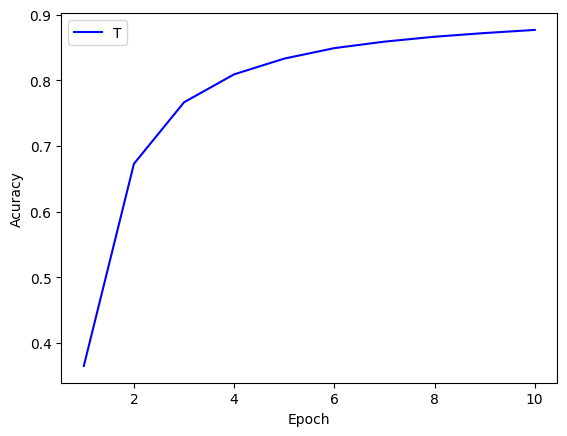

In [30]:
training_accuracy = history.history['accuracy']

epoch_count = range(1,len(training_loss)+1)

plt.plot(epoch_count,training_accuracy,'b-')
plt.legend("Training Acuracy")
plt.xlabel('Epoch')
plt.ylabel('Acuracy')
plt.show()